# States based on gdf for 13003

In [1]:
%load_ext autoreload

%autoreload 2
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import cluster
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, roc_curve

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression, LinearRegression

import warnings
import numpy as np
from collections import OrderedDict

from lob_data_utils import lob, db_result
from lob_data_utils.svm_calculation import lob_svm

sns.set_style('whitegrid')
warnings.filterwarnings('ignore')

## Data preparation

In [2]:
data_length = 10000
stock = '13003'

In [8]:
r = 0.5
s = 0.1
K = 50
filename = 'gdf_{}_len{}_r{}_s{}_K{}'.format(stock, data_length, r, s, K)
df, df_cv, df_test = lob.load_prepared_data(
    filename, data_dir='../gaussian_filter/data_gdf/', cv=True, length=data_length)
df.head()

,Unnamed: 0,gdf_0,gdf_1,gdf_10,gdf_11,gdf_12,gdf_13,gdf_14,gdf_15,gdf_16,...,gdf_47,gdf_48,gdf_49,gdf_5,gdf_6,gdf_7,gdf_8,gdf_9,mid_price,mid_price_indicator
2000,2000,0.006760,0.018681,0.014294,0.014383,0.018128,0.047202,0.048114,0.063115,0.063165,...,0.012718,0.011904,0.009920,0.021937,0.021967,0.010843,0.012568,0.012917,419.90,0.0
2001,2001,0.005194,0.006879,0.014207,0.015867,0.015904,0.018252,0.049497,0.049962,0.059861,...,0.013928,0.008394,0.006687,0.012457,0.016475,0.017089,0.015987,0.014242,419.85,1.0
2002,2002,0.008602,0.020754,0.014618,0.014707,0.013419,0.048328,0.049457,0.067741,0.067791,...,0.007581,0.006768,0.006758,0.024796,0.023997,0.015161,0.009782,0.010131,419.90,1.0
2003,2003,0.013573,0.013573,0.014551,0.016386,0.044483,0.046841,0.069439,0.069900,0.071292,...,0.012135,0.008163,0.006486,0.015379,0.012318,0.009547,0.010471,0.014347,419.95,0.0
2004,2004,0.012396,0.020951,0.017282,0.016835,0.015493,0.046196,0.047325,0.069203,0.069252,...,0.015252,0.014438,0.012282,0.024626,0.023874,0.019360,0.015235,0.015584,419.90,1.0


## States based on GDF

In [61]:
states_labels = ['gdf_{}'.format(i) for i in range(20, 30)]
dbscan = cluster.AffinityPropagation() #eps=0.01, min_samples=3)
groups = dbscan.fit_predict(df[states_labels])

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [62]:
df['db'] = groups
for i in np.unique(dbscan.labels_):
    print(i, len(df[df['db'] == i]))

0 7
1 11
2 6
3 23
4 1
5 12
6 17
7 50
8 46
9 32
10 5
11 13
12 17
13 23
14 6
15 42
16 43
17 41
18 34
19 31
20 20
21 34
22 30
23 30
24 26
25 23
26 46
27 32
28 55
29 20
30 52
31 104
32 31
33 61
34 44
35 58
36 34
37 23
38 43
39 94
40 70
41 55
42 58
43 49
44 38
45 32
46 41
47 67
48 54
49 66
50 65
51 32
52 70
53 44
54 66
55 50
56 25
57 16
58 47
59 1
60 2
61 9
62 11
63 1
64 7
65 3
66 2
67 5
68 3
69 18
70 15
71 12
72 9
73 7
74 5
75 3
76 7
77 7
78 1
79 1
80 1
81 2
82 2
83 1
84 1
85 3
86 5
87 12
88 24
89 19
90 21
91 7
92 47
93 59
94 16
95 87
96 12
97 39
98 20
99 71
100 30
101 55
102 29
103 8
104 7
105 5
106 7
107 1
108 1
109 19
110 16
111 35
112 18
113 30
114 33
115 23
116 3
117 20
118 15
119 11
120 43
121 31
122 4
123 2
124 19
125 58
126 34
127 10
128 17
129 17
130 9
131 48
132 22
133 18
134 62
135 14
136 3
137 10
138 35
139 18
140 4
141 15
142 4
143 1
144 1
145 20
146 20
147 31
148 52
149 2
150 5
151 8
152 12
153 52
154 18
155 23
156 27
157 51
158 35
159 33
160 14
161 28
162 76
163 61
164 28
16

In [63]:
import plotly.offline as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

from ipywidgets import interact, interactive, fixed, interact_manual, widgets


@interact(num=(-1, len(np.unique(dbscan.labels_)) - 1),
         gdf_start=(0, K), gdf_end=(0, K))
def _plot_lob_normalized(num, gdf_start=20, gdf_end=30):
    py_config = {'displayModeBar': False, 'showLink': False, 'editable': False}

    data = []
    for i in range(gdf_start, gdf_end):
        data.append(go.Scatter(
            x=df.index, # assign x as the dataframe column 'x'
            y=df[df['db'] == num]['gdf_{}'.format(i)]))
    title='df'
    layout = go.Layout(
            title = title,
            showlegend = True,
            legend = dict(orientation="h")
        )

    figure = go.Figure(data=data, layout=layout)
    py.iplot(figure, filename='pandas/basic-line-plot', config=py_config)

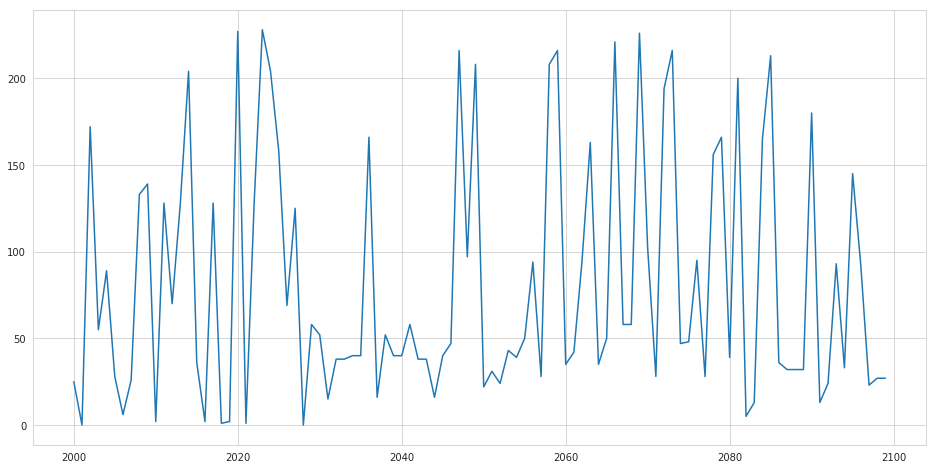

In [67]:
df['db'].iloc[0:100].plot(figsize=(16, 8))

## Lets cluster the states!

In [69]:
def add_group_history_states(df, n):
    additionals = {}
    for j in range(n, 0, -1):
        additionals['db_{}'.format(j)] = []
    for i, row in df.iterrows():
        for j in range(n, 0, -1):
            if i - j > 0 and i - j in df.index:
                additionals['db_{}'.format(j)].append(df.loc[i-j]['db'])
            else:
                additionals['db_{}'.format(j)].append(None)
    for k in additionals.keys():
        if len(additionals[k]) == len(df):
            df[k] = additionals[k]
    return df

In [75]:
df = add_group_history_states(df, 5)
df.dropna(inplace=True)
group_states_labels = ['db_{}'.format(i) for i in range(1, 6)] 

In [78]:
cluster_alg = cluster.DBSCAN()
pred = cluster_alg.fit_predict(df[group_states_labels])
df['states'] = pred
df.head()

,Unnamed: 0,gdf_0,gdf_1,gdf_10,gdf_11,gdf_12,gdf_13,gdf_14,gdf_15,gdf_16,...,gdf_9,mid_price,mid_price_indicator,db,db_5,db_4,db_3,db_2,db_1,states
2005,2005,0.020745,0.022422,0.020142,0.021781,0.049357,0.049922,0.069013,0.069474,0.066471,...,0.020184,419.95,0.0,28,25.0,0.0,172.0,55.0,89.0,-1
2006,2006,0.007396,0.009081,0.017760,0.020051,0.018958,0.018103,0.048875,0.049340,0.062308,...,0.017794,419.85,1.0,6,0.0,172.0,55.0,89.0,28.0,-1
2007,2007,0.020574,0.022251,0.019805,0.021757,0.049019,0.049612,0.068439,0.068899,0.070591,...,0.019847,419.95,1.0,26,172.0,55.0,89.0,28.0,6.0,-1
2008,2008,0.023767,0.024836,0.047949,0.053051,0.063829,0.066170,0.067533,0.045957,0.038039,...,0.038531,420.05,0.0,133,55.0,89.0,28.0,6.0,26.0,-1
2009,2009,0.020316,0.021994,0.017511,0.019814,0.046873,0.048817,0.062876,0.063337,0.070880,...,0.017553,419.95,0.0,139,89.0,28.0,6.0,26.0,133.0,-1


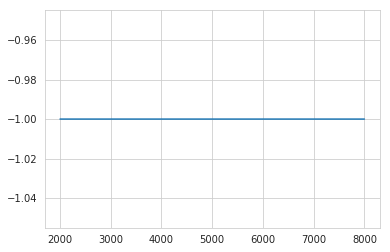

In [77]:
df['states'].plot()